In [1]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

dataset = pd.read_csv("weather-data.csv")
dataset.head() # Show the first five results.


,station,valid,tmpc,dwpc,relh,sknt,gust,peak_wind_drct
0,NZAA,2015-01-01 00:00,21.0,11.0,52.77,15.0,NaN,NaN
1,NZAA,2015-01-01 00:30,21.0,10.0,49.37,16.0,NaN,NaN
2,NZAA,2015-01-01 01:00,21.0,12.0,56.38,16.0,NaN,NaN
3,NZAA,2015-01-01 01:30,21.0,13.0,60.21,16.0,NaN,NaN
4,NZAA,2015-01-01 02:00,21.0,12.0,56.38,16.0,NaN,NaN


In [8]:
# mean - Average value of the data.
# std (Standard Deviation) - How far away from the mean is the overall data?
# 25% - The 25th percentile value.
# 50% - Median.
# 75% - The 75th percentile value.
dataset.describe()

,tmpc,dwpc,relh,sknt,gust,peak_wind_drct
count,103678.000000,103678.000000,103593.000000,103704.000000,1203.000000,0.0
mean,15.811503,12.115772,79.782307,8.919029,30.962594,NaN
std,4.235197,3.738005,12.562199,5.348379,6.319510,NaN
min,2.000000,-2.000000,29.230000,0.000000,13.000000,NaN
25%,13.000000,9.000000,71.450000,5.000000,27.000000,NaN
50%,16.000000,12.000000,81.990000,8.000000,31.000000,NaN
75%,19.000000,15.000000,88.180000,12.000000,35.000000,NaN
max,29.000000,23.000000,100.000000,42.000000,56.000000,NaN


In [11]:
# mean - Average value of the data.
dataset.mean()

C:\Users\lyoha\AppData\Local\Temp\ipykernel_9508\1799472221.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dataset.mean()


tmpc              15.811503
dwpc              12.115772
relh              79.782307
sknt               8.919029
gust              30.962594
peak_wind_drct          NaN
dtype: float64

In [14]:
# std (Standard Deviation) - How far away from the mean is the overall data?
dataset.std()

C:\Users\lyoha\AppData\Local\Temp\ipykernel_9508\178401259.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dataset.std()


tmpc               4.235197
dwpc               3.738005
relh              12.562199
sknt               5.348379
gust               6.319510
peak_wind_drct          NaN
dtype: float64

In [27]:

# 0.25 - The 25th percentile value.
# 0.75 - The 75th percentile value.
# 0.10 - The 10th percentile value.
# 0.90 - The 90th percentile value.
dataset.quantile([0.25,0.75,0.10,0.90])


,tmpc,dwpc,relh,sknt,gust,peak_wind_drct
0.25,13.0,9.0,71.45,5.0,27.0,NaN
0.75,19.0,15.0,88.18,12.0,35.0,NaN
0.10,11.0,7.0,62.69,3.0,23.0,NaN
0.90,21.0,17.0,93.83,16.0,38.0,NaN


In [28]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103713 entries, 0 to 103712
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0    station        103713 non-null  object 
 1   valid           103713 non-null  object 
 2   tmpc            103678 non-null  float64
 3   dwpc            103678 non-null  float64
 4   relh            103593 non-null  float64
 5   sknt            103704 non-null  float64
 6   gust            1203 non-null    float64
 7   peak_wind_drct  0 non-null       float64
dtypes: float64(6), object(2)
memory usage: 6.3+ MB


In [6]:

# change the "valid" column value type from object to datetime
dataset['valid'] = pd.to_datetime(dataset['valid'])

In [12]:
dataset.info()
dataset.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103713 entries, 0 to 103712
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0    station        103713 non-null  object        
 1   valid           103713 non-null  datetime64[ns]
 2   tmpc            103678 non-null  float64       
 3   dwpc            103678 non-null  float64       
 4   relh            103593 non-null  float64       
 5   sknt            103704 non-null  float64       
 6   gust            1203 non-null    float64       
 7   peak_wind_drct  0 non-null       float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 6.3+ MB


,station,valid,tmpc,dwpc,relh,sknt,gust,peak_wind_drct
0,NZAA,2015-01-01 00:00:00,21.0,11.0,52.77,15.0,NaN,NaN
1,NZAA,2015-01-01 00:30:00,21.0,10.0,49.37,16.0,NaN,NaN
2,NZAA,2015-01-01 01:00:00,21.0,12.0,56.38,16.0,NaN,NaN
3,NZAA,2015-01-01 01:30:00,21.0,13.0,60.21,16.0,NaN,NaN
4,NZAA,2015-01-01 02:00:00,21.0,12.0,56.38,16.0,NaN,NaN


<AxesSubplot:>

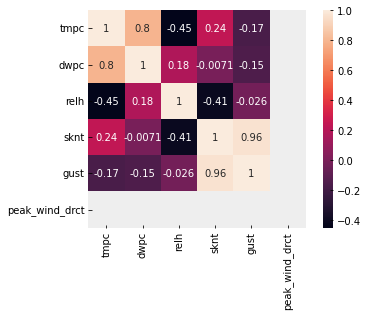

In [15]:
# Correlation plot.
# Values nearing one or negative one can have a pattern where a(x) = k*b(x)
# Values closer to the 0 value indicates the plot of a(x) and b(x) has no noticeable pattern.

# Correlations we found:
#A strong positive correlation between sknt and gust. As well as a strong positive correlation between tmpc and dwpc.
#A very slight positive correlation between tmpc and sknt, between dwpc and relh.
#Strong negative correlations between relh and tmpc, relh and sknt
#Very slight negative correlations between gust and tmpc, gust and dwpc.
#Almost No correlation between relh and gust. No correlation between dwpc and sknt
sns.heatmap(dataset.corr(), annot=True, square=True)

C:\Users\viken\AppData\Local\Temp\ipykernel_33456\1978787629.py:37: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


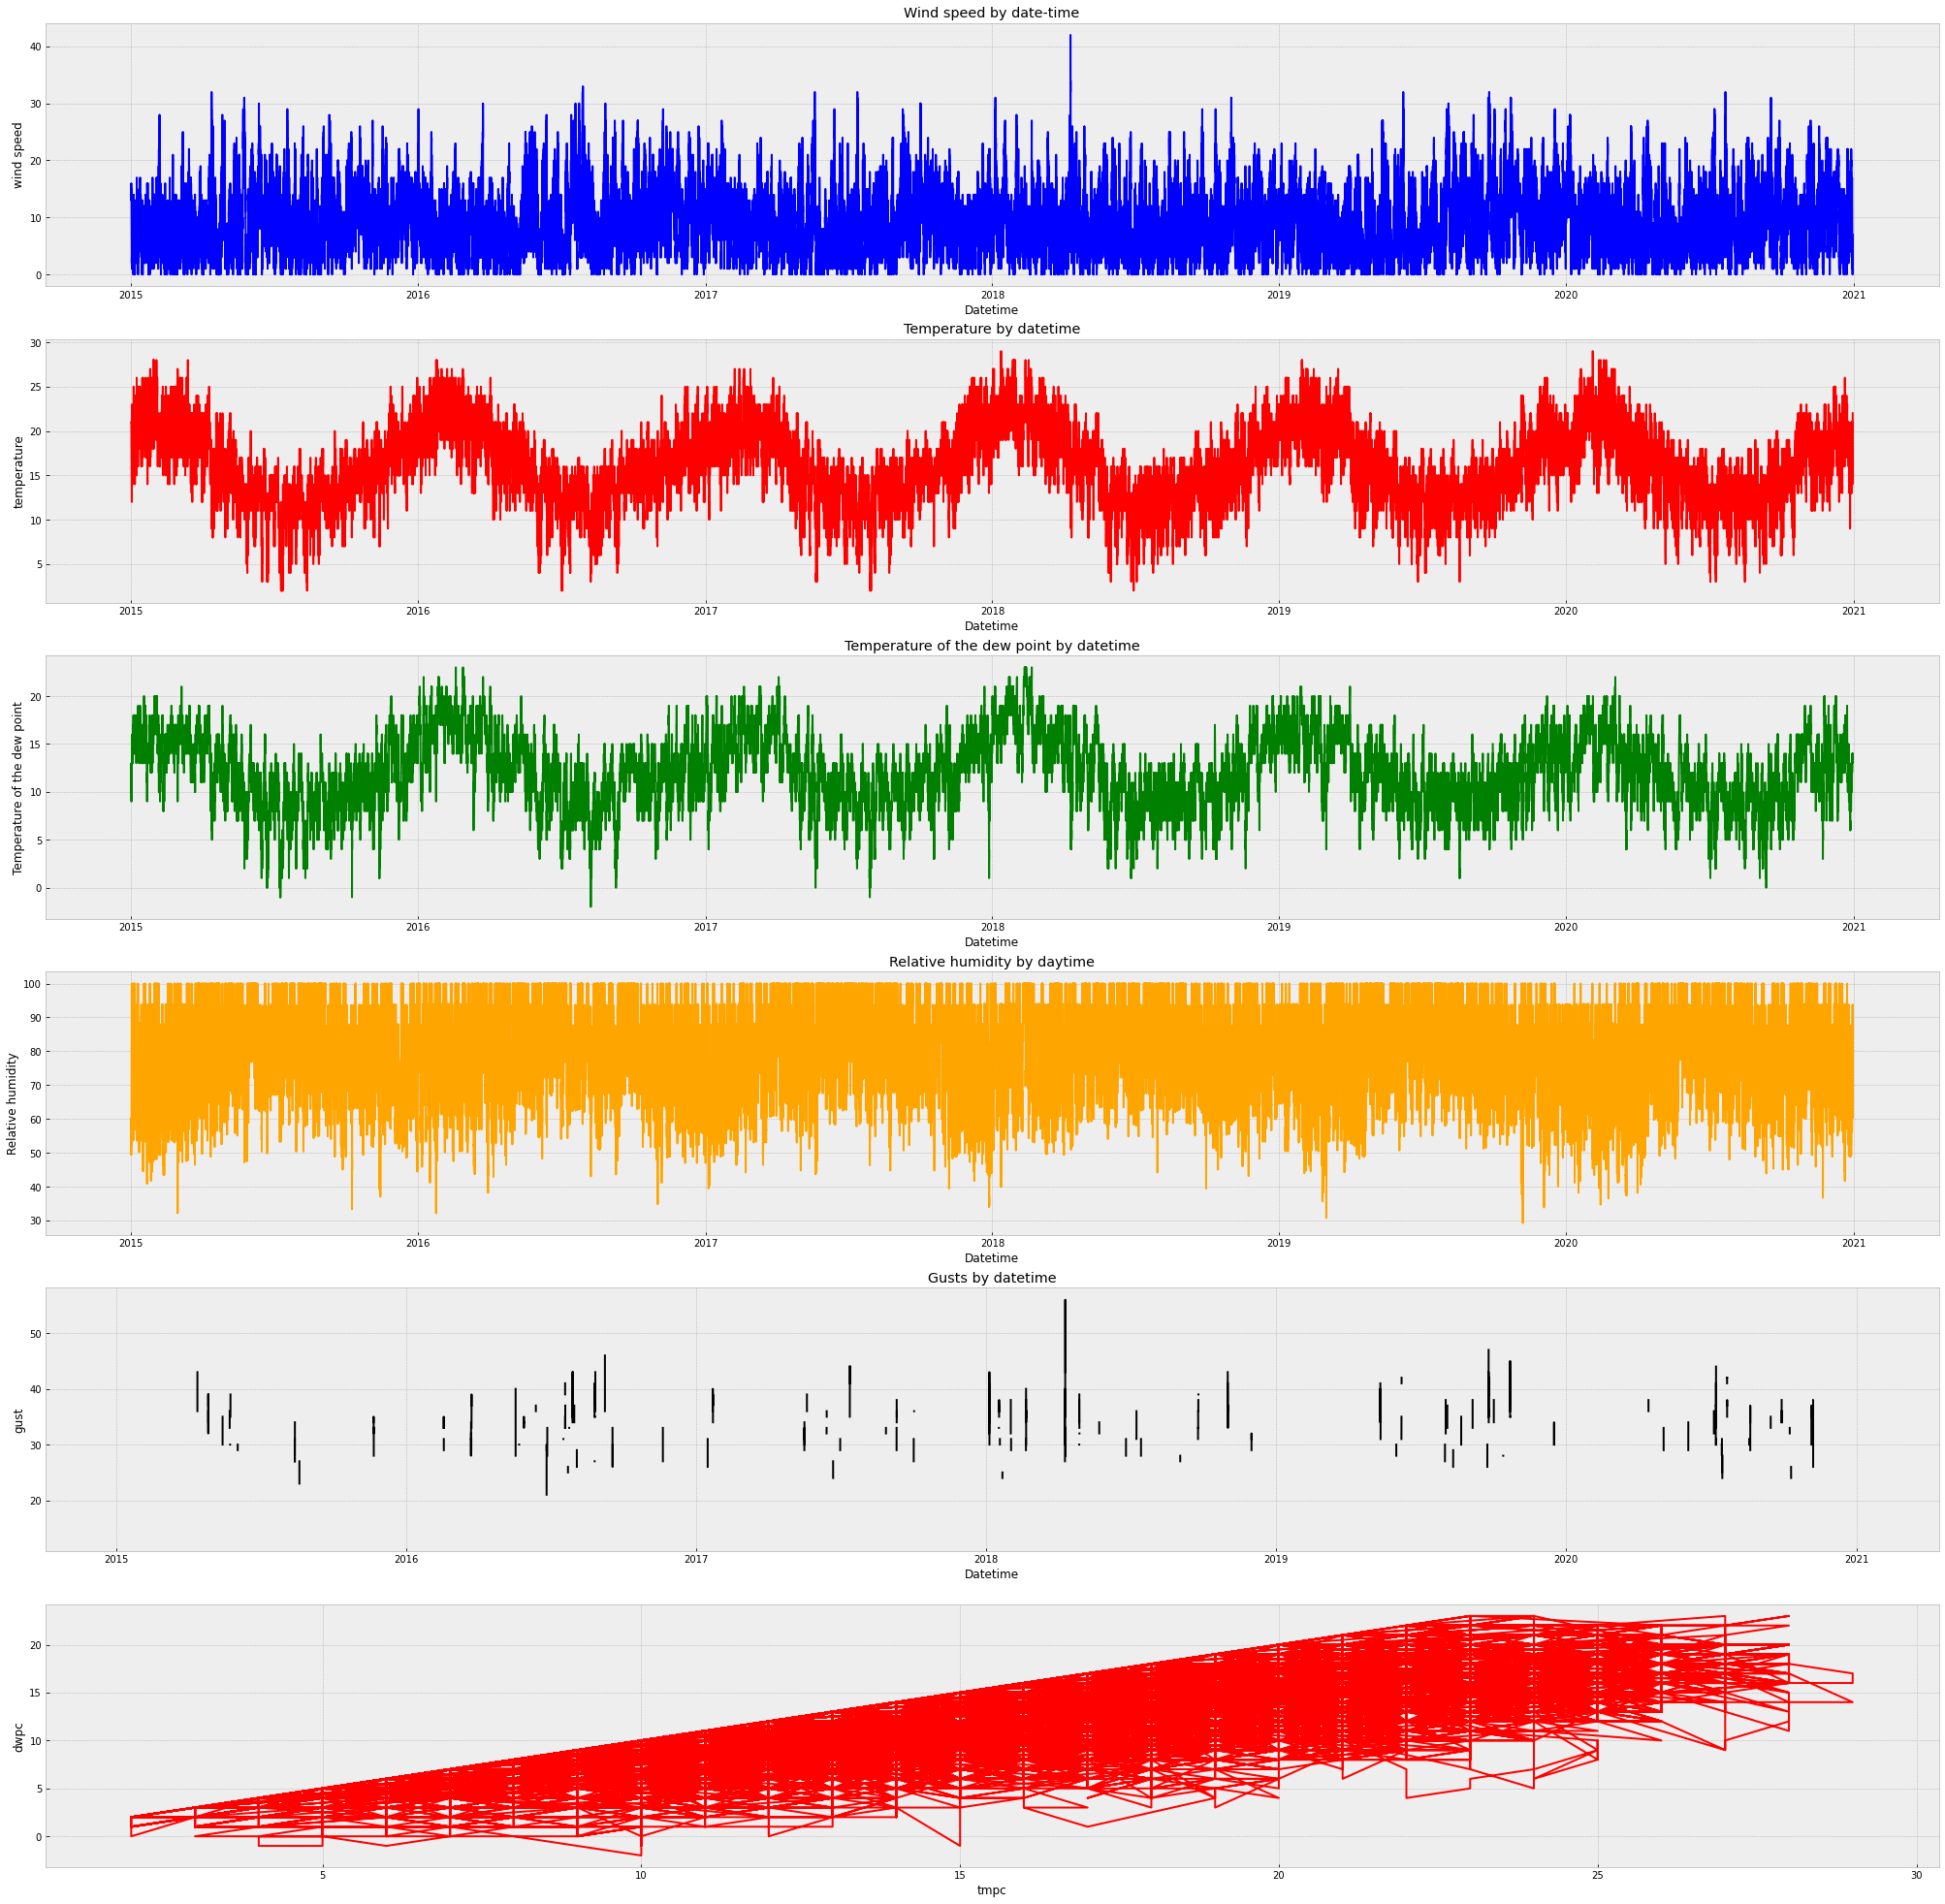

In [37]:

plt.style.use("bmh")
fig, (ax1,ax2,ax3,ax4,ax5,ax6) = plt.subplots(nrows=6, ncols=1, squeeze=True)

ax1.plot(dataset["valid"], dataset["sknt"], color="blue")
ax1.set_title("Wind speed by date-time")
ax1.set_xlabel("Datetime")
ax1.set_ylabel("wind speed")

ax2.plot(dataset["valid"], dataset["tmpc"], color="red")
ax2.set_title("Temperature by datetime")
ax2.set_xlabel("Datetime")
ax2.set_ylabel("temperature")

ax3.plot(dataset["valid"], dataset["dwpc"], color="green")
ax3.set_title("Temperature of the dew point by datetime")
ax3.set_xlabel("Datetime")
ax3.set_ylabel("Temperature of the dew point")

ax4.plot(dataset["valid"], dataset["relh"], color="orange")
ax4.set_title("Relative humidity by daytime")
ax4.set_xlabel("Datetime")
ax4.set_ylabel("Relative humidity")

ax5.plot(dataset["valid"], dataset["gust"], color="black")
ax5.set_title("Gusts by datetime")
ax5.set_xlabel("Datetime")
ax5.set_ylabel("gust")

ax6.plot(dataset["tmpc"], dataset["dwpc"], color="red")
ax6.set_title("")
ax6.set_xlabel("tmpc")
ax6.set_ylabel("dwpc")



fig.set_size_inches(35,35)
fig.show()

In [38]:
# Based on EDA:
# We can see what wind gust didnot happen every day, but if it happen the avereage power was  30 knots, and average between 25 and 45 knots
# Temperature of the environment in celsius and Temperature of the dew point in the environment in celsius shows us strong colleration
#During whole dates avveradehumidity per day was very high about 80% with max rande per day from 90 to 100%
#We can also see that there is strong correlation between wind and gusts.
